<a href="https://colab.research.google.com/github/mazon1/ML-Test/blob/master/Kaggle_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Libraries
# -*- coding: utf-8 -*-
"""
Created on Sun Dec 27 15:40:29 2020

@author: Surface Device
"""

import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import plot
import sklearn.tree as skTree
import sklearn.metrics as skMetrics
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

In [ ]:
# import google drive
from google.colab import drive
drive.mount('/content/drive/')

# Change directory to google drive- Just upload the file right into the drive you want(Uchennamachine) for easy access
%cd /content/drive/My Drive/
# %% load data
TestData= pd.read_csv("titanictest.csv")
TrainData= pd.read_csv("titanictrain.csv")


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive


In [ ]:
#display training data
TrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#display test data
TestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


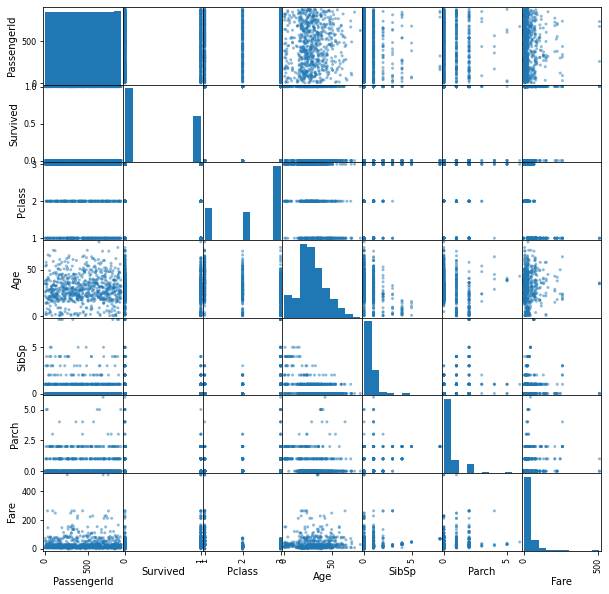

In [ ]:
# %% lets see correlations

pd.plotting.scatter_matrix(TrainData, figsize=(10,10))
plt.show()

In [ ]:
# CleanTestData=TestData.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
CleanTestData=TestData.drop(['Name','Ticket','Cabin'],axis=1)

# Clean Train Data
CleanTrainData=TrainData.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)


In [ ]:
CleanTrainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
CleanTestData.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [ ]:
# find columns with nan in Training set
for NAN in CleanTrainData.columns:
    if CleanTrainData[NAN].isna().any()==True:
        print("Total mising values in {} for Test data is". format(NAN))
        print(CleanTrainData[NAN].isna().sum())

Total mising values in Age for Test data is
177
Total mising values in Embarked for Test data is
2


In [ ]:
#Clean Train Data 
CleanTrainData['Age'].fillna(CleanTrainData['Age'].mean(), inplace=True)
#deleting the 2 missing values for embarked
CleanTrainData=CleanTrainData[CleanTrainData['Embarked'].isna()==False]
CleanTrainData.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [ ]:
# find columns with nan in Test set
for NAN in CleanTestData.columns:
    if CleanTestData[NAN].isna().any()==True:
        print("Total mising values in {} for Test data is". format(NAN))
        print(CleanTestData[NAN].isna().sum())

Total mising values in Age for Test data is
86
Total mising values in Fare for Test data is
1


In [ ]:
#Clean Test Data 
CleanTestData['Age'].fillna(CleanTestData['Age'].mean(), inplace=True)
CleanTestData['Fare'].fillna(CleanTestData['Fare'].mean(), inplace=True)
CleanTestData.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [ ]:
# %% now lets assign data types to the feastures
Integer_features=['Age','SibSp','Parch']
Categorical_features=['Pclass','Sex','Embarked']

for FEATURES in Integer_features:
    CleanTestData[FEATURES] = CleanTestData[FEATURES].astype('int64')
    CleanTrainData[FEATURES] = CleanTrainData[FEATURES].astype('int64')

for FEATURES in Categorical_features:
    CleanTestData[FEATURES] = CleanTestData[FEATURES].astype('category')
    CleanTrainData[FEATURES] = CleanTrainData[FEATURES].astype('category')

In [ ]:
CleanTrainData['Survived'] = CleanTrainData['Survived'].astype('category')

print(CleanTestData.dtypes)
print('\n')
print(CleanTrainData.dtypes)


PassengerId       int64
Pclass         category
Sex            category
Age               int64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object


Survived    category
Pclass      category
Sex         category
Age            int64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object


In [ ]:
# %% now lets separate the label from the Training data set
TargetLabel=CleanTrainData['Survived']
# now we will remove the target label (Survived from the training clean data set)
CleanTrainData=CleanTrainData.drop(['Survived'],axis=1)


In [ ]:
#lets do some visualization
for feature in CleanTrainData.columns:
  fig = px.histogram(CleanTrainData, x=feature, color_discrete_sequence=['indianred'], marginal="box")
  fig.update_layout(height=300, margin=dict(l=15, r=15, t=0, b=0))
  plot(fig)
  # if I were to do this in jupyter notebook, I would use
  fig.show()

In [ ]:
# # %% now lets convert this categorical varibales into numerical by creating dummy variables.
# ## even though Pclass is in numbers, we would still convert into dummy varibales because the three classes is not ordinal
for FEATURES in Categorical_features:
  CleanTestData = pd.concat([CleanTestData, pd.get_dummies(CleanTestData[FEATURES], prefix=FEATURES)], axis=1).drop([FEATURES], axis=1)
  CleanTrainData = pd.concat([CleanTrainData, pd.get_dummies(CleanTrainData[FEATURES], prefix=FEATURES)], axis=1).drop([FEATURES], axis=1)


In [ ]:
CleanTrainData.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,35,1,0,53.1000,1,0,0,1,0,0,0,1
4,35,0,0,8.0500,0,0,1,0,1,0,0,1


In [ ]:
# %% lets split the training data into training and validation data
X_train, X_validation, y_train, y_validation = train_test_split(CleanTrainData, TargetLabel, test_size=0.25, random_state=42)


In [ ]:
#Write out all data
X_train.to_csv('titanictrain_features.csv', index=False)
X_validation.to_csv('titanicval_features.csv', index=False)


y_train.to_csv('titanictrain_labels.csv', index=False)
y_validation.to_csv('titanicval_labels.csv', index=False)

In [ ]:
#Read in Training Data
tr_features = pd.read_csv('titanictrain_features.csv')
tr_labels = pd.read_csv('titanictrain_labels.csv')

In [ ]:
#Define Results to print
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# Decision Trees

In [ ]:
#Importing Libraries
import joblib
import pandas as pd
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
#Fitting the Model and Evaluating
dtree = tree.DecisionTreeClassifier()
parameters = {
    
    'min_samples_leaf': [1,5,10,15,20],
    # to test 1,5,10,15,20 leaves
    'max_depth': [2,4,8,16,32,None],
    'min_samples_split': [5,10,15,20],
    'criterion': ['gini','entropy'],
    'splitter': ['best','random']
    # to test various depths including No limitiation on the depth i.e. None
    
}
#using GridSearchCV to loop through predefined hyperparameters and fit your estimator (model) on your training set
cv = GridSearchCV(dtree,parameters, cv = 5)
#cv = 5 meaning it will run 5-fold validation for each hyperparameter combination
cv.fit(tr_features,tr_labels.values.ravel())
# we use ravel for the labels to convert it to an array, since the label is usually just one column and the algorithm expects an array
print_results(cv)

BEST PARAMS: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}

0.776 (+/-0.04) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.778 (+/-0.037) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
0.776 (+/-0.04) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
0.778 (+/-0.037) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
0.776 (+/-0.04) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 15, 'splitter': 'best'}
0.779 (+/-0.036) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 15, 'splitter': 'random'}
0.776 (+/-0.04) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20, 'spli

In [ ]:
cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=16, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
cv = cv.best_estimator_
#Predicting the labels using the optimized hyperparameters
tr_labelspredict = cv.predict(tr_features)

In [ ]:
# To view accuracy score, recall score, precision score and f1 score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

 #Train Scores

acc_train = accuracy_score(y_train,tr_labelspredict)
p_score_train = precision_score(y_train,tr_labelspredict)
r_score_train = recall_score(y_train,tr_labelspredict)
f1_score_train = f1_score(y_train,tr_labelspredict)

 #Validation Scores

val_labelspredict = cv.predict(X_validation)
acc_test = accuracy_score(y_validation,val_labelspredict)
p_score_test = precision_score(y_validation,val_labelspredict)
r_score_test = recall_score(y_validation,val_labelspredict)
f1_score_test = f1_score(y_validation,val_labelspredict)

print(f'The Accuracy score for the training set is:{acc_train}')
print(f'The Precision score for the training set is:{p_score_train}')
print(f'The Recall score for the training set is:{r_score_train}')
print(f'The F1 score for the training set is:{f1_score_train}')
print('--------------------------------------------------------------')
print(f'The Accuracy score for the validation set is:{acc_test}')
print(f'The Precision score for the validation set is:{p_score_test}')
print(f'The Recall score for the validation set is:{r_score_test}')
print(f'The F1 score for the validation set is:{f1_score_test}')
# train_results = [acc_train,p_score_train,r_score_train,f1_score_train]
# test_results = [acc_test,p_score_test,r_score_test,f1_score_test]


The Accuracy score for the training set is:0.8543543543543544
The Precision score for the training set is:0.8609865470852018
The Recall score for the training set is:0.7441860465116279
The F1 score for the training set is:0.7983367983367984
--------------------------------------------------------------
The Accuracy score for the validation set is:0.7937219730941704
The Precision score for the validation set is:0.7195121951219512
The Recall score for the validation set is:0.7195121951219512
The F1 score for the validation set is:0.7195121951219512


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
print (RandomForestClassifier())
print (RandomForestRegressor())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      rand

In [ ]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,250],
    # to test 5, 50 and 250 decision trees
    'max_depth': [2,4,8,16,32,None]
    # to test various depths including No limitiation on the depth i.e. None
}
#using GridSearchCV to loop through predefined hyperparameters and fit your estimator (model) on your training set
cv = GridSearchCV(rf,parameters, cv = 5)
#cv = 5 meaning it will run 5-fold validation for each hyperparameter combination
cv.fit(tr_features,tr_labels.values.ravel())
# we use ravel for the labels to convert it to an array, since the label is usually just one column and the algorithm expects an array
print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.796 (+/-0.031) for {'max_depth': 2, 'n_estimators': 5}
0.793 (+/-0.04) for {'max_depth': 2, 'n_estimators': 50}
0.785 (+/-0.036) for {'max_depth': 2, 'n_estimators': 250}
0.811 (+/-0.036) for {'max_depth': 4, 'n_estimators': 5}
0.814 (+/-0.033) for {'max_depth': 4, 'n_estimators': 50}
0.815 (+/-0.041) for {'max_depth': 4, 'n_estimators': 250}
0.845 (+/-0.045) for {'max_depth': 8, 'n_estimators': 5}
0.821 (+/-0.052) for {'max_depth': 8, 'n_estimators': 50}
0.847 (+/-0.031) for {'max_depth': 8, 'n_estimators': 250}
0.811 (+/-0.066) for {'max_depth': 16, 'n_estimators': 5}
0.82 (+/-0.046) for {'max_depth': 16, 'n_estimators': 50}
0.827 (+/-0.047) for {'max_depth': 16, 'n_estimators': 250}
0.8 (+/-0.062) for {'max_depth': 32, 'n_estimators': 5}
0.83 (+/-0.055) for {'max_depth': 32, 'n_estimators': 50}
0.82 (+/-0.049) for {'max_depth': 32, 'n_estimators': 250}
0.794 (+/-0.07) for {'max_depth': None, 'n_estimators': 5}
0.815 (+/-0.044) fo

In [ ]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
cv = cv.best_estimator_
#Predicting the labels using the optimized hyperparameters
tr_labelspredict = cv.predict(tr_features)

In [ ]:
# To view accuracy score, recall score, precision score and f1 score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

 #Train Scores

acc_train = accuracy_score(y_train,tr_labelspredict)
p_score_train = precision_score(y_train,tr_labelspredict)
r_score_train = recall_score(y_train,tr_labelspredict)
f1_score_train = f1_score(y_train,tr_labelspredict)

 #Validation Scores

val_labelspredict = cv.predict(X_validation)
acc_test = accuracy_score(y_validation,val_labelspredict)
p_score_test = precision_score(y_validation,val_labelspredict)
r_score_test = recall_score(y_validation,val_labelspredict)
f1_score_test = f1_score(y_validation,val_labelspredict)

print(f'The Accuracy score for the training set is:{acc_train}')
print(f'The Precision score for the training set is:{p_score_train}')
print(f'The Recall score for the training set is:{r_score_train}')
print(f'The F1 score for the training set is:{f1_score_train}')
print('--------------------------------------------------------------')
print(f'The Accuracy score for the validation set is:{acc_test}')
print(f'The Precision score for the validation set is:{p_score_test}')
print(f'The Recall score for the validation set is:{r_score_test}')
print(f'The F1 score for the validation set is:{f1_score_test}')
# train_results = [acc_train,p_score_train,r_score_train,f1_score_train]
# test_results = [acc_test,p_score_test,r_score_test,f1_score_test]


The Accuracy score for the training set is:0.924924924924925
The Precision score for the training set is:0.9642857142857143
The Recall score for the training set is:0.8372093023255814
The F1 score for the training set is:0.8962655601659751
--------------------------------------------------------------
The Accuracy score for the validation set is:0.7937219730941704
The Precision score for the validation set is:0.7368421052631579
The Recall score for the validation set is:0.6829268292682927
The F1 score for the validation set is:0.7088607594936709


In [ ]:
#Random Forest Scores looking a lot better than DT

# kNN

In [ ]:
#importing Libraries
from sklearn.neighbors import KNeighborsClassifier
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
# To show list of hyperparameters that we can tune
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Fitting the Model and Evaluating
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [1,3, 5,11,15,20],
    # to test 1,3,5,10,15,20 leaves,
    'weights':['uniform','distance']
    
}
#using GridSearchCV to loop through predefined hyperparameters and fit your estimator (model) on your training set
cv = GridSearchCV(knn,parameters, cv = 5)
#cv = 5 meaning it will run 5-fold validation for each hyperparameter combination
cv.fit(tr_features,tr_labels.values.ravel())
# we use ravel for the labels to convert it to an array, since the label is usually just one column and the algorithm expects an array
print_results(cv)

BEST PARAMS: {'n_neighbors': 20, 'weights': 'distance'}

0.707 (+/-0.016) for {'n_neighbors': 1, 'weights': 'uniform'}
0.707 (+/-0.016) for {'n_neighbors': 1, 'weights': 'distance'}
0.707 (+/-0.062) for {'n_neighbors': 3, 'weights': 'uniform'}
0.707 (+/-0.041) for {'n_neighbors': 3, 'weights': 'distance'}
0.703 (+/-0.067) for {'n_neighbors': 5, 'weights': 'uniform'}
0.721 (+/-0.056) for {'n_neighbors': 5, 'weights': 'distance'}
0.689 (+/-0.096) for {'n_neighbors': 11, 'weights': 'uniform'}
0.724 (+/-0.077) for {'n_neighbors': 11, 'weights': 'distance'}
0.704 (+/-0.073) for {'n_neighbors': 15, 'weights': 'uniform'}
0.727 (+/-0.087) for {'n_neighbors': 15, 'weights': 'distance'}
0.692 (+/-0.057) for {'n_neighbors': 20, 'weights': 'uniform'}
0.733 (+/-0.075) for {'n_neighbors': 20, 'weights': 'distance'}


In [ ]:
cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

In [ ]:
cv = cv.best_estimator_
#Predicting the labels using the optimized hyperparameters
tr_labelspredict = cv.predict(tr_features)


In [ ]:
# To view accuracy score, recall score, precision score and f1 score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

 #Train Scores

acc_train = accuracy_score(y_train,tr_labelspredict)
p_score_train = precision_score(y_train,tr_labelspredict)
r_score_train = recall_score(y_train,tr_labelspredict)
f1_score_train = f1_score(y_train,tr_labelspredict)

 #Validation Scores

val_labelspredict = cv.predict(X_validation)
acc_test = accuracy_score(y_validation,val_labelspredict)
p_score_test = precision_score(y_validation,val_labelspredict)
r_score_test = recall_score(y_validation,val_labelspredict)
f1_score_test = f1_score(y_validation,val_labelspredict)

print(f'The Accuracy score for the training set is:{acc_train}')
print(f'The Precision score for the training set is:{p_score_train}')
print(f'The Recall score for the training set is:{r_score_train}')
print(f'The F1 score for the training set is:{f1_score_train}')
print('--------------------------------------------------------------')
print(f'The Accuracy score for the validation set is:{acc_test}')
print(f'The Precision score for the validation set is:{p_score_test}')
print(f'The Recall score for the validation set is:{r_score_test}')
print(f'The F1 score for the validation set is:{f1_score_test}')
# train_results = [acc_train,p_score_train,r_score_train,f1_score_train]
# test_results = [acc_test,p_score_test,r_score_test,f1_score_test]



The Accuracy score for the training set is:0.978978978978979
The Precision score for the training set is:0.9959349593495935
The Recall score for the training set is:0.9496124031007752
The F1 score for the training set is:0.9722222222222223
--------------------------------------------------------------
The Accuracy score for the validation set is:0.7443946188340808
The Precision score for the validation set is:0.676056338028169
The Recall score for the validation set is:0.5853658536585366
The F1 score for the validation set is:0.6274509803921567


In [ ]:
#knn looking better than both Decision Tree  and Random Forest on training set. But the validation scores are way ( Overfitting problems maybe?)

# Additional Notes_Afonja please note


The test data in Kaggle doesn't include the Survived Column. 

Did you take a look at the submission Sample?
Can you write out the final code for testing the model using the "CleanedTestData" to yield an output just like the Submission Sample?

Please review the codes below- I've seen some experts combine the Sibsp and Parch features for the reasons detailed below. If we apply this, we may get better scores.


# Compare SibSp (# of Siblings) to Parch (Parents & Children)


<Figure size 432x288 with 0 Axes>

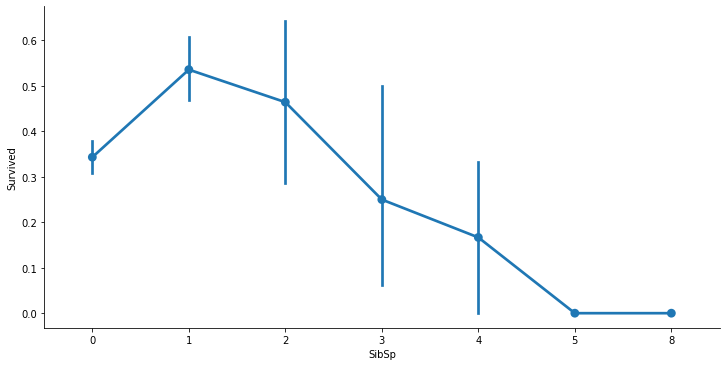

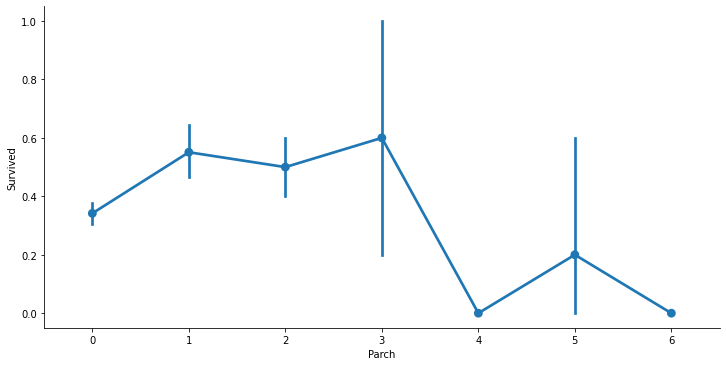

In [ ]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=CleanTrainData, kind='point', aspect=2, )

In both cases, the higher the number of siblings and spouses SibSpouse, Or the higher the number of Parents and children, the lower the chances of survival. 
Let's check with a correlation map:

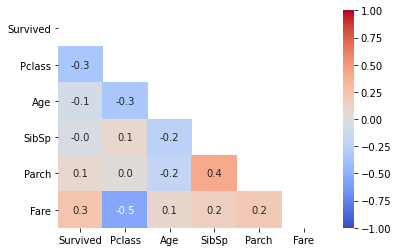

In [ ]:
# Generate correlation matrix heat map
matrix = np.triu(CleanTrainData.corr())
sns.heatmap(CleanTrainData.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

Highest Correlation is between SibSp & Parch. We can combine this into one Feature called "Family"

In [ ]:
CleanTrainData['Family'] = CleanTrainData['SibSp'] + CleanTrainData['Parch']
#and drop the correlated feature
CleanTrainData.drop([ 'SibSp', 'Parch'], axis=1, inplace=True)
CleanTrainData.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0
